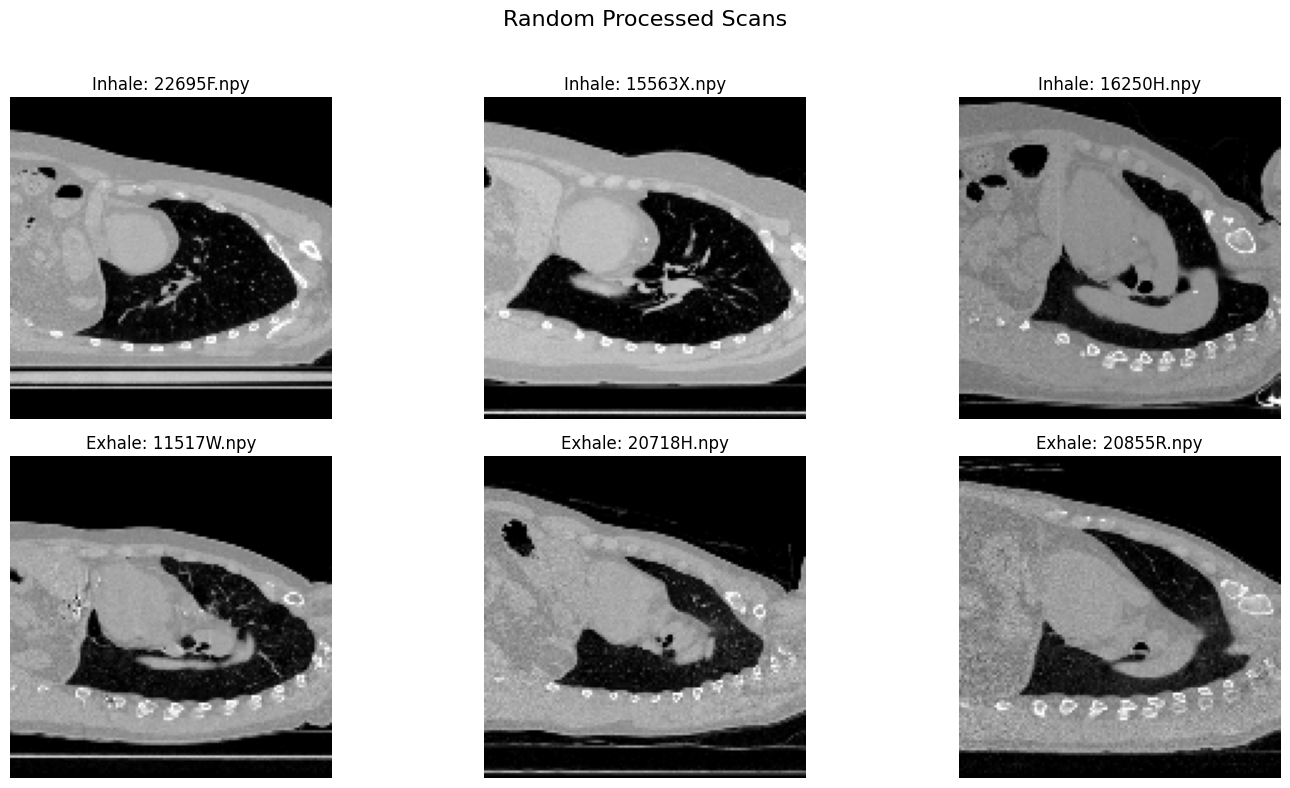

In [2]:
import random
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# --- Corrected Configuration ---
# Point this to the actual location of your data.
PROCESSED_DATA_DIR = Path("/hot/Akul/exhale_pred_data")

# --- Load file paths ---
try:
    inhale_files = list(PROCESSED_DATA_DIR.glob("inhale/*.npy"))
    exhale_files = list(PROCESSED_DATA_DIR.glob("exhale/*.npy"))
    
    if not inhale_files or not exhale_files:
        raise FileNotFoundError(f"No .npy files found in {PROCESSED_DATA_DIR}")
        
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please double-check the PROCESSED_DATA_DIR path.")

# --- Select and display random images ---
if inhale_files and exhale_files:
    num_images_to_show = 3
    fig, axes = plt.subplots(2, num_images_to_show, figsize=(15, 8))
    fig.suptitle("Random Processed Scans", fontsize=16)

    # Display inhale images
    for i in range(num_images_to_show):
        file_path = random.choice(inhale_files)
        scan_3d = np.load(file_path)
        slice_idx = int(scan_3d.shape[0] * 0.6)
        scan_2d = scan_3d[slice_idx, :, :]
        
        ax = axes[0, i]
        ax.imshow(scan_2d, cmap='gray')
        ax.set_title(f"Inhale: {file_path.name}")
        ax.axis('off')

    # Display exhale images
    for i in range(num_images_to_show):
        file_path = random.choice(exhale_files)
        scan_3d = np.load(file_path)
        slice_idx = int(scan_3d.shape[0] * 0.6)
        scan_2d = scan_3d[slice_idx, :, :]
        
        ax = axes[1, i]
        ax.imshow(scan_2d, cmap='gray')
        ax.set_title(f"Exhale: {file_path.name}")
        ax.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

--- Raw Scan Stats (11358C) ---
Shape: (512, 512, 581)
Min value: 0.00, Max value: 3797.00

--- Processed Scan Stats (11358C) ---
Shape: (128, 128, 128)
Min value: 0.00, Max value: 1.00



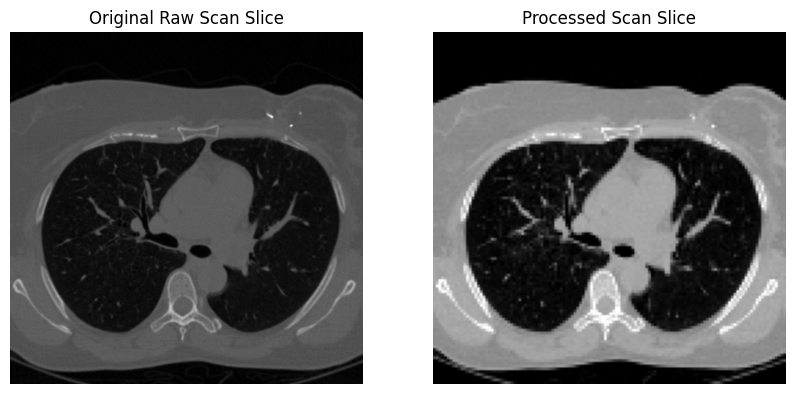

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- Configuration ---
RAW_DATA_DIR = Path("/hot/COPDGene-1")
PROCESSED_DATA_DIR = Path("/hot/Akul/exhale_pred_data")
PATIENT_ID = "11358C" 

# --- Load Data ---
try:
    raw_path = RAW_DATA_DIR / f"{PATIENT_ID}_INSP_image.nii.gz"
    raw_nii = nib.load(raw_path)
    raw_scan_3d = raw_nii.get_fdata()

    processed_path = PROCESSED_DATA_DIR / "inhale" / f"{PATIENT_ID}.npy"
    processed_scan_3d = np.load(processed_path)
except FileNotFoundError as e:
    print(f"Error loading files: {e}")

# --- Print Statistics ---
print(f"--- Raw Scan Stats ({PATIENT_ID}) ---")
print(f"Shape: {raw_scan_3d.shape}")
print(f"Min value: {raw_scan_3d.min():.2f}, Max value: {raw_scan_3d.max():.2f}\n")

print(f"--- Processed Scan Stats ({PATIENT_ID}) ---")
print(f"Shape: {processed_scan_3d.shape}")
print(f"Min value: {processed_scan_3d.min():.2f}, Max value: {processed_scan_3d.max():.2f}\n")

# --- Visualize Side-by-Side ---
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display raw scan slice (Axial view)
raw_slice_idx = int(raw_scan_3d.shape[2] * 0.6)
axes[0].imshow(raw_scan_3d[:, :, raw_slice_idx].T, cmap='gray')
axes[0].set_title("Original Raw Scan Slice")
axes[0].axis('off')

# Display processed scan slice (Axial view)
processed_slice_idx = int(processed_scan_3d.shape[2] * 0.6)
axes[1].imshow(processed_scan_3d[:, :, processed_slice_idx].T, cmap='gray') # Also add .T
axes[1].set_title("Processed Scan Slice")
axes[1].axis('off')

plt.show()

--- Stats BEFORE Resizing ---
Min: 0.00, Max: 4095.00
1st Percentile: 0.00, 99th Percentile: 1392.00

--- Stats AFTER Resizing ---
Min: 0.00, Max: 4090.52
1st Percentile: 0.57, 99th Percentile: 1383.31


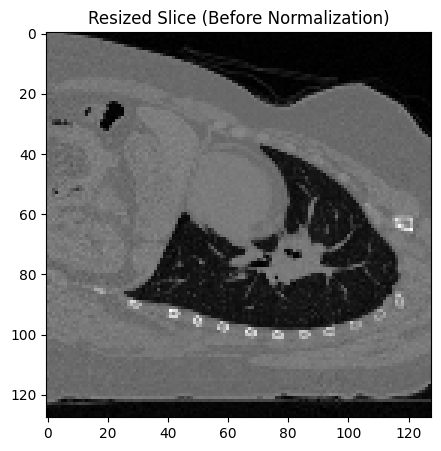

In [5]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.ndimage import zoom

# --- Configuration ---
RAW_DATA_DIR = Path("/hot/COPDGene-1")
PATIENT_ID = "15068N" # A scan that failed previously
TARGET_SHAPE = (128, 128, 128)

# --- Load Raw Data ---
raw_path = RAW_DATA_DIR / f"{PATIENT_ID}_INSP_image.nii.gz"
raw_nii = nib.load(raw_path)
raw_scan_3d = raw_nii.get_fdata()

print(f"--- Stats BEFORE Resizing ---")
print(f"Min: {np.min(raw_scan_3d):.2f}, Max: {np.max(raw_scan_3d):.2f}")
print(f"1st Percentile: {np.percentile(raw_scan_3d, 1):.2f}, 99th Percentile: {np.percentile(raw_scan_3d, 99):.2f}\n")

# --- Resize the Raw Data ---
zoom_factors = [t / s for t, s in zip(TARGET_SHAPE, raw_scan_3d.shape)]
resized_scan_3d = zoom(raw_scan_3d, zoom_factors, order=1)

print(f"--- Stats AFTER Resizing ---")
print(f"Min: {np.min(resized_scan_3d):.2f}, Max: {np.max(resized_scan_3d):.2f}")
print(f"1st Percentile: {np.percentile(resized_scan_3d, 1):.2f}, 99th Percentile: {np.percentile(resized_scan_3d, 99):.2f}")

# --- Visualize the crushed resized slice ---
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
slice_idx = int(resized_scan_3d.shape[0] * 0.6)
ax.imshow(resized_scan_3d[slice_idx, :, :], cmap='gray')
ax.set_title("Resized Slice (Before Normalization)")
plt.show()

--- Analysis of Failing Scan: 22957J_EXP_image.nii.gz ---
1st Percentile (min_bound): 0.0
99th Percentile (max_bound): 1396.0


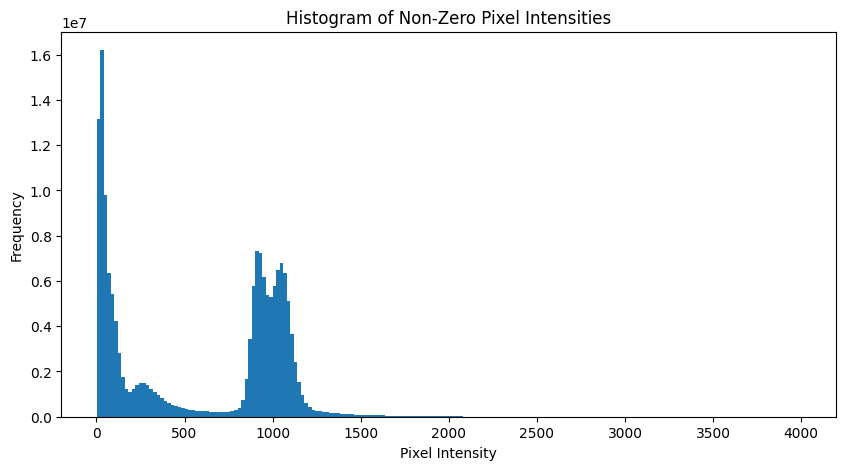

In [6]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- Configuration ---
RAW_DATA_DIR = Path("/hot/COPDGene-1")
# !!! IMPORTANT: Use a patient ID of a scan that FAILED (turned black) !!!
PATIENT_ID = "22957J" # From your image, this exhale scan failed
SCAN_TYPE = "EXP"    # Use "EXP" for exhale, "INSP" for inhale

# --- Load Raw Data ---
raw_path = RAW_DATA_DIR / f"{PATIENT_ID}_{SCAN_TYPE}_image.nii.gz"
raw_nii = nib.load(raw_path)
raw_scan_3d = raw_nii.get_fdata()

# --- Print the critical percentile values ---
min_bound = np.percentile(raw_scan_3d, 1)
max_bound = np.percentile(raw_scan_3d, 99)

print(f"--- Analysis of Failing Scan: {raw_path.name} ---")
print(f"1st Percentile (min_bound): {min_bound}")
print(f"99th Percentile (max_bound): {max_bound}")
if min_bound == max_bound:
    print("\n>>> DIAGNOSIS: The min and max bounds are identical. This is the cause of the error.")

# --- Visualize the Pixel Intensity Histogram ---
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# We plot a histogram of the non-zero values to see the tissue distribution
ax.hist(raw_scan_3d[raw_scan_3d > 0].flatten(), bins=200)
ax.set_title("Histogram of Non-Zero Pixel Intensities")
ax.set_xlabel("Pixel Intensity")
ax.set_ylabel("Frequency")
plt.show()

In [8]:
# Verifies that for every inhale scan, a corresponding exhale scan exists.
from pathlib import Path

DATA_ROOT = Path("/hot/COPDGene-1")
all_files = list(DATA_ROOT.glob("*_INSP_image.nii.gz"))
missing_pairs = 0

print(f"Checking {len(all_files)} inhale scans for their exhale pairs...")

for inhale_path in all_files:
    patient_id = inhale_path.name.split('_')[0]
    exhale_path = DATA_ROOT / f"{patient_id}_EXP_image.nii.gz"
    if not exhale_path.exists():
        print(f"--> Missing exhale pair for: {inhale_path.name}")
        missing_pairs += 1

if missing_pairs == 0:
    print("\n✅ Success! All inhale scans have a corresponding exhale scan.")
else:
    print(f"\n❌ Found {missing_pairs} scans with missing pairs.")

Checking 8702 inhale scans for their exhale pairs...

✅ Success! All inhale scans have a corresponding exhale scan.


In [9]:
# Checks the shapes of a few random raw scans to look for inconsistencies.
import nibabel as nib
import random
from pathlib import Path

DATA_ROOT = Path("/hot/COPDGene-1")
all_files = list(DATA_ROOT.glob("*_image.nii.gz"))
num_to_check = 10
selected_files = random.sample(all_files, num_to_check)

print(f"Checking shapes of {num_to_check} random raw scans...")
for file_path in selected_files:
    try:
        shape = nib.load(file_path).shape
        print(f"{file_path.name:<25} | Shape: {shape}")
    except Exception as e:
        print(f"Could not load {file_path.name}: {e}")

print("\nCheck if the shapes are generally consistent (e.g., all have 3 dimensions).")

Checking shapes of 10 random raw scans...
22981G_INSP_image.nii.gz  | Shape: (512, 512, 623)
10496J_EXP_image.nii.gz   | Shape: (512, 512, 651)
16872P_INSP_image.nii.gz  | Shape: (512, 512, 553)
24044A_INSP_image.nii.gz  | Shape: (512, 512, 432)
11679W_INSP_image.nii.gz  | Shape: (512, 512, 573)
19522D_INSP_image.nii.gz  | Shape: (512, 512, 632)
24680C_EXP_image.nii.gz   | Shape: (512, 512, 583)
14260A_INSP_image.nii.gz  | Shape: (512, 512, 401)
25168X_INSP_image.nii.gz  | Shape: (512, 512, 616)
25606V_EXP_image.nii.gz   | Shape: (512, 512, 344)

Check if the shapes are generally consistent (e.g., all have 3 dimensions).


Comparing histograms for patient: 24066K


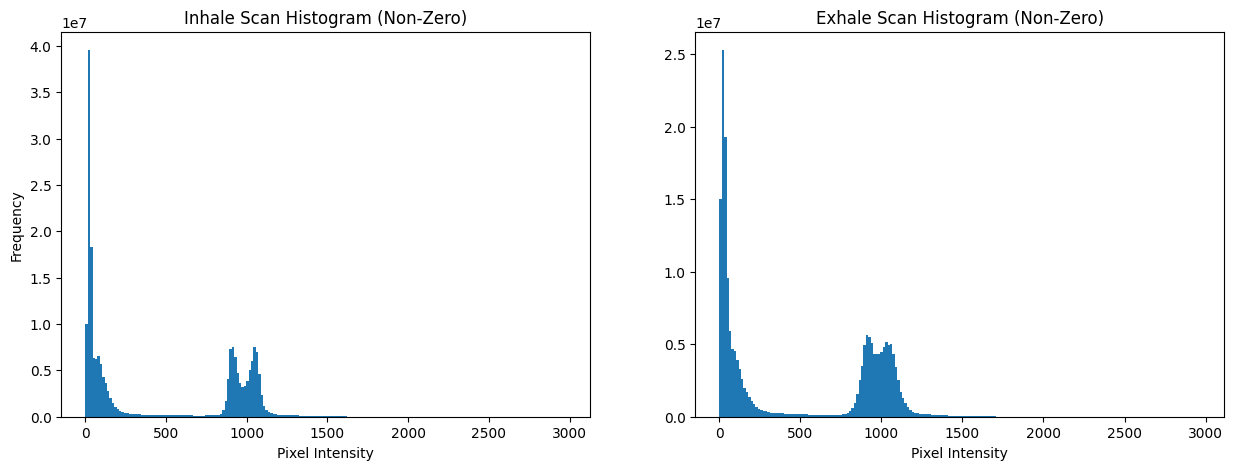

In [10]:
# Compares the pixel intensity histograms of a random inhale/exhale pair.
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import random
from pathlib import Path

DATA_ROOT = Path("/hot/COPDGene-1")
inhale_files = list(DATA_ROOT.glob("*_INSP_image.nii.gz"))
random_inhale_path = random.choice(inhale_files)
patient_id = random_inhale_path.name.split('_')[0]
random_exhale_path = DATA_ROOT / f"{patient_id}_EXP_image.nii.gz"

print(f"Comparing histograms for patient: {patient_id}")

inhale_scan = nib.load(random_inhale_path).get_fdata()
exhale_scan = nib.load(random_exhale_path).get_fdata()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram for non-zero values of the inhale scan
axes[0].hist(inhale_scan[inhale_scan > 0].flatten(), bins=200)
axes[0].set_title("Inhale Scan Histogram (Non-Zero)")
axes[0].set_xlabel("Pixel Intensity")
axes[0].set_ylabel("Frequency")

# Plot histogram for non-zero values of the exhale scan
axes[1].hist(exhale_scan[exhale_scan > 0].flatten(), bins=200)
axes[1].set_title("Exhale Scan Histogram (Non-Zero)")
axes[1].set_xlabel("Pixel Intensity")

plt.show()